# 图像阈值
前面在给messi图像左上角加logo获得logo掩膜的时候，用过了阈值函数将其二值化，

## 简单阈值
在这里，问题直截了当。对于每个像素，应用相同的阈值。如果像素值小于阈值，则将其设置为0，否则将其设置为最大值。函数**cv.threshold**用于应用阈值。第一个参数是源图像，它**应该是灰度图像**。第二个参数是阈值，用于对像素值进行分类。第三个参数是分配给超过阈值的像素值的最大值。OpenCV提供了不同类型的阈值，这由函数的第四个参数给出。通过使用**cv.THRESH_BINARY**类型。所有简单的阈值类型为：

- cv.THRESH_BINARY
- cv.THRESH_BINARY_INV
- cv.THRESH_TRUNC
- cv.THRESH_TOZERO
- cv.THRESH_TOZERO_INV

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv.imread('./images/gradient.jpg')
img

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [3]:
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img

array([[  0,   0,   0, ...,   1,   1,   1],
       [  0,   0,   0, ...,   1,   1,   1],
       [  0,   0,   0, ...,   1,   1,   1],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [4]:
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [5]:
# imread加上flag参数可以直接在读的时候变成灰度图
img1 = cv.imread('./images/gradient.jpg',cv.IMREAD_GRAYSCALE)
img1

array([[  0,   0,   0, ...,   1,   1,   1],
       [  0,   0,   0, ...,   1,   1,   1],
       [  0,   0,   0, ...,   1,   1,   1],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

来看看每种的效果

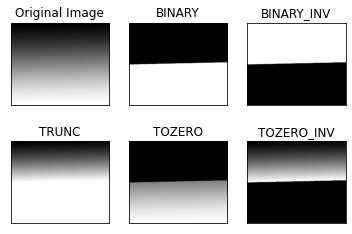

In [8]:
ret, thresh1 = cv.threshold(img1, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img1, 127, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img1, 127, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img1, 127, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img1, 127, 255, cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img1, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

再次搬出这张好图，对照着看

[![5gCvN9.png](https://z3.ax1x.com/2021/10/23/5gCvN9.png)](https://imgtu.com/i/5gCvN9)

## 自适应阈值

在上一节中，我们使用一个全局值作为阈值。但这可能并非在所有情况下都很好，例如，如果图像在不同区域具有不同的光照条件。在这种情况下，自适应阈值阈值化可以提供帮助。在此，算法基于像素周围的小区域确定像素的阈值。因此，对于同一图像的不同区域，我们获得了不同的阈值，这为光照度变化的图像提供了更好的结果。

除上述参数外，方法**cv.adaptiveThreshold**还包含三个输入参数：

该**adaptiveMethod**决定阈值是如何计算的：

**cv.ADAPTIVE_THRESH_MEAN_C**: 阈值是邻近区域的平均值减去常数**C**。 **cv.ADAPTIVE_THRESH_GAUSSIAN_C**: 阈值是邻域值的高斯加权总和减去常数**C**。

该**BLOCKSIZE**确定附近区域的大小，**C**是从邻域像素的平均或加权总和中减去的一个常数

## Otsu二值化
在全局阈值化中，我们使用任意选择的值作为阈值。相反，Otsu的方法避免了必须选择一个值并自动确定它的情况。

考虑仅具有两个不同图像值的图像（双峰图像），其中直方图将仅包含两个峰。一个好的阈值应该在这两个值的中间。类似地，Otsu的方法从图像直方图中确定最佳全局阈值。

为此，使用了**cv.threshold**, **cv.THRESH_OTSU**作为附加标志传递。阈值可以任意选择。然后，算法找到最佳阈值，该阈值作为第一输出返回。

查看以下示例。输入图像为噪点图像。在第一种情况下，采用值为127的全局阈值。在第二种情况下，直接采用Otsu阈值法。在第三种情况下，首先使用5x5高斯核对图像进行滤波以去除噪声，然后应用Otsu阈值处理。

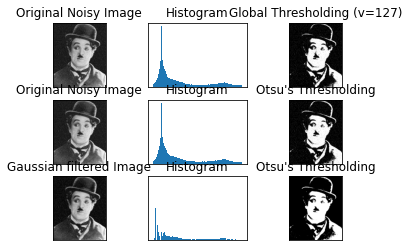

In [14]:
img2 = cv.imread('./images/noisy.png', cv.IMREAD_GRAYSCALE)

# 第一种用global thresholding
ret1, th1 = cv.threshold(img2, 127, 255, cv.THRESH_BINARY)

# otsu thresholding
ret2, th2 = cv.threshold(img2, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

# otsu thresholding after gaussian filtering
blur = cv.GaussianBlur(img2, (5,5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

images1 = [img2, 0, th1,
           img2, 0, th2,
           blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3): # 3组图片 每第i组的0，1，2整体计数就是i*3+1
    plt.subplot(3, 3, i*3+1), plt.imshow(images1[i*3], 'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])

    plt.subplot(3, 3, i*3+2), plt.hist(images1[i*3].ravel(), 256) # ravel A 1-D array, containing the elements of the input, is returned.A copy is made only if needed 直方图按照 bins划分横轴
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3, 3, i*3+3), plt.imshow(images1[i*3+2], 'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

plt.show()

## otsu二值化的实现
我们的目的就是找到一个合适的灰度值，大于这个值的我们将它称之为背景（灰度值越大像素越黑），小于这个值的我们将它称之为前景（灰度值越小像素越白）。

怎么确定这个值就是我们想要的值呢？

这里引入方差的概念，方差越大，相关性越低，黑白越分明。

算法假定该图像根据双模直方图（前景像素和背景像素）把包含两类像素，**于是它要计算能将两类分开的最佳阈值，使得它们的类内方差最小, 由于两两平方距离恒定，所以即它们的类间方差最大**.

在大津算法中，我们穷举搜索能使类内方差最小的阈值,并定义两个类方差的加权和：
$$\sigma _{\omega}^{2}(t) = \omega _{0}(t)\sigma _{0}^{2}(t) + \omega _{1}(t)\sigma _{1}^{2}(t)$$
权重$\omega _i$是被阈值$t$分开的两个类的概率， $\sigma _i^{2}$是这两个类的方差

### 算法
1. 图像像素N， 灰度范围$[0,L-1]$, 对应灰度级$i$的像素为$n_i$, 概率为：
$$p_i = n_i / N$$
2. 遍历所有可能的t，找到类间方差最大的两类所对应的阈值，有一个最大则取那个最大，两个则取平均

    类概率：
    $$\omega _0 = \sum _{i = 0}^{T}p_i$$
    $$\omega _0 = \sum _{i = T}^{L - 1}p_i = 1 - \omega _0$$
    即有$$\omega _0 + \omega _1 = 1 \tag{1}$$
    
    类均值：
    $$\mu _0 = \sum _{i = 0}^{T} \frac{ip_i}{\omega _0}$$
    $$\mu _1 = \sum _{i = T}^{L - 1} \frac{ip_i}{\omega _1}$$
    图像总平均灰度：
    $$\mu = \omega _0 \mu _0 + \omega _1 \mu _1 \tag{2}$$
    类间方差：
    $$\sigma_{\omega}^2 = \omega_0 (\mu_0 - \mu)^2 + \omega_1 (\mu_1 - \mu)^2$$
    可等价为：
    $$\sigma = \omega_0 \omega_1 (\mu_0 - \mu_1)^2$$
    推导如下：
    
    [![5WWAED.png](https://z3.ax1x.com/2021/10/24/5WWAED.png)](https://imgtu.com/i/5WWAED)

加权类内方差：

[![5WLS8f.png](https://z3.ax1x.com/2021/10/24/5WLS8f.png)](https://imgtu.com/i/5WLS8f)